In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as pl
import xarray as xr
from scipy.integrate import odeint
import regionmask
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import scipy.stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table 
import time
import warnings
import seaborn as sns
from sklearn.metrics import r2_score#print(r2_score(y3,y3_fitted))

import xlrd
import random
####     ax.set_extent([-15, 45, 28, 76], crs=ccrs.PlateCarree())
from sklearn import preprocessing
robust = preprocessing.RobustScaler()
warnings.filterwarnings('ignore')
from matplotlib import cm
from matplotlib.colors import ListedColormap
from cartopy.util import add_cyclic_point

In [10]:
cd //home/user/workdir/Pre

/home/user/workdir/Pre


In [11]:
pre_50_55=xr.open_dataset('era5_regrid_50-55.nc')


In [6]:
gini_all_region=np.load('/home/user/降雨/Gini系数/Figure/v_4/fig.2/gini_all_region.npy')
gini_wet_region=np.load('/home/user/降雨/Gini系数/Figure/v_4/fig.2/gini_all_region.npy')
gini_dry_region=np.load('/home/user/降雨/Gini系数/Figure/v_4/fig.2/gini_all_region.npy')

In [7]:
gini_all_region.shape

(46, 70)

In [13]:
names=regionmask.defined_regions.ar6.land.names

In [14]:
lat= pre_50_55.latitude
lon=pre_50_55.longitude
mask = regionmask.defined_regions.ar6.land.mask(lon, lat)

In [14]:
mask_46=np.zeros((46,181,360))
for i in range(0,46):
    mask_temp=mask==i
    mask_46[i,:]=mask_temp+0
mask_46[mask_46==0]=np.nan

In [8]:
trend_gini_all=np.zeros((2,46))
for region in range(0,46):
    y1=gini_all_region[region,:]
    x1=np.arange(0,70)
    x1=sm.add_constant(x1)
    model1 = sm.OLS(y1,x1)
    res1 = model1.fit()
    trend_gini_all[0,region]=res1.params[1]
    trend_gini_all[1,region]=res1.pvalues[1]

In [20]:
trend_gini_all[0,:]

array([-7.26250092e-05, -9.71488225e-05,  3.37916370e-05,  1.36029293e-04,
       -4.40923043e-05, -8.50758588e-05, -5.50139029e-05,  1.67913437e-04,
        1.74004312e-04,  8.66804469e-05,  7.62316789e-05,  1.96469984e-04,
        3.39643613e-04,  8.73429786e-05,  3.13859023e-04,  1.43549671e-04,
       -2.28724189e-04,  4.39400710e-05,  9.72378129e-06,  1.41207771e-04,
       -4.40855115e-05,  5.33190991e-04,  2.59729871e-04,  8.25932354e-04,
        9.27975356e-04,  4.15996814e-05,  1.66174815e-05,  2.05062830e-04,
       -1.43567209e-04, -2.76755883e-05,  1.84316018e-05,  6.60088773e-05,
        1.40732169e-06,  1.22672607e-04, -1.02798323e-04,  2.03179515e-04,
        3.09993819e-05,  6.51737117e-05,  7.25362967e-05,  6.07747779e-05,
        1.37710842e-04, -6.19045295e-05,  5.66827384e-05,  1.49317715e-04,
                   nan,             nan])

In [28]:
cd /home/user/降雨/Gini系数/Figure/v_5（和师兄老板讨论完后）/fig.2

/home/user/降雨/Gini系数/Figure/v_5（和师兄老板讨论完后）/fig.2


In [33]:
pwd

'/home/user/降雨/Gini系数/Figure/v_5（和师兄老板讨论完后）/fig.2'

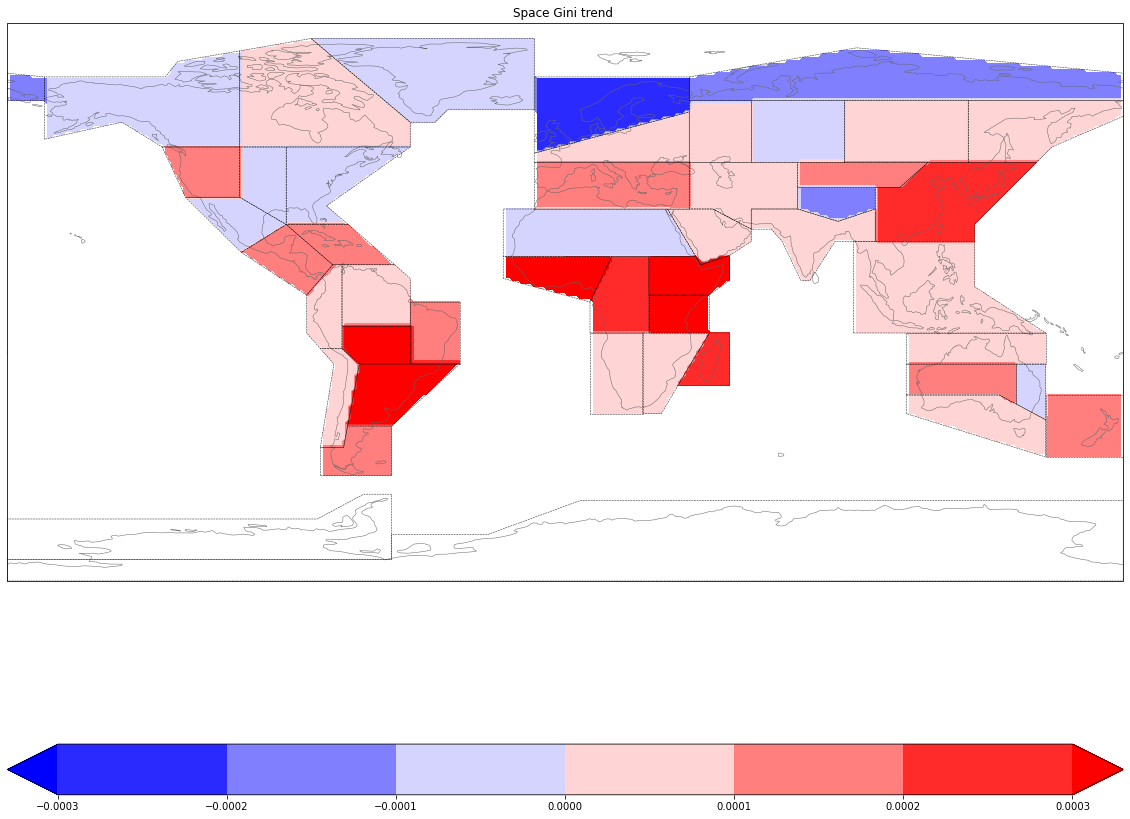

In [34]:
temp = np.full([len(pre_50_55.latitude),len(pre_50_55.longitude)],np.nan)
for region_ind in range(0,46):
    temp[mask==region_ind] = trend_gini_all[0,region_ind]
TGI_grid = xr.DataArray(temp,coords=[pre_50_55.latitude, pre_50_55.longitude],dims=['lat','lon'])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
# ax.coastlines('110m')
import palettable
#levels=np.linspace(-0.001,0.001,5)

#cmap = palettable.cartocolors.diverging.Geyser_7.mpl_colormap
#cmap = palettable.cartocolors.diverging.Fall_7.mpl_colormap
cmap = 'bwr'
levels=np.arange(-0.0003,0.0004,0.0001)
x = pre_50_55.longitude
y = pre_50_55.latitude
z = TGI_grid#pr.prate.mean('time')


cycle_plot, cycle_lon = add_cyclic_point(z, coord=x)
cycle_LON, cycle_LAT = np.meshgrid(cycle_lon, y)

cf = ax.contourf(cycle_LON, cycle_LAT, cycle_plot, transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 extend='both',levels=levels)
ax.set_title('Space Gini trend ')
cb=fig.colorbar(cf, orientation='horizontal')
#cb.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.rcParams['svg.fonttype'] = 'none'
ar6_land=regionmask.defined_regions.ar6.land
line_kws  = dict(
    lw=0.5,linestyle='--')
ax = ar6_land.plot(ax=ax,label="abbrev", line_kws=line_kws,add_label=False,add_coastlines=True) 
fig.savefig('trend Space Gini all.svg')

In [31]:
gini_all_region_mean=np.nanmean(gini_all_region[:,-20:],axis=1)

In [38]:
np.nanmax(gini_all_region_mean)

0.688583476056299

In [39]:
np.nanmin(gini_all_region_mean)

0.17168195517889653

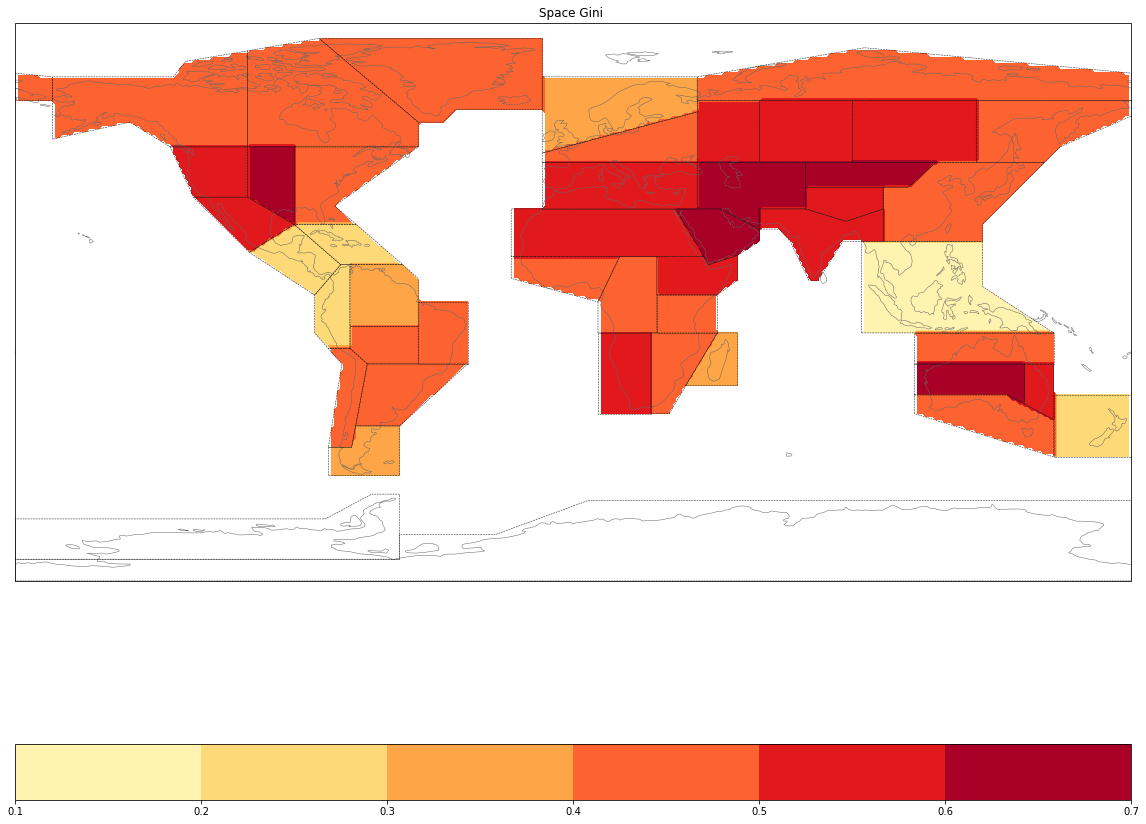

In [40]:
temp = np.full([len(pre_50_55.latitude),len(pre_50_55.longitude)],np.nan)
for region_ind in range(0,46):
    temp[mask==region_ind] = gini_all_region_mean[region_ind]
TGI_grid = xr.DataArray(temp,coords=[pre_50_55.latitude, pre_50_55.longitude],dims=['lat','lon'])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
# ax.coastlines('110m')
import palettable
#levels=np.linspace(-0.001,0.001,5)

#cmap = palettable.cartocolors.diverging.Geyser_7.mpl_colormap
#cmap = palettable.cartocolors.diverging.Fall_7.mpl_colormap
cmap = 'YlOrRd'
levels=np.arange(0.1,0.8,0.1)
x = pre_50_55.longitude
y = pre_50_55.latitude
z = TGI_grid#pr.prate.mean('time')


cycle_plot, cycle_lon = add_cyclic_point(z, coord=x)
cycle_LON, cycle_LAT = np.meshgrid(cycle_lon, y)

cf = ax.contourf(cycle_LON, cycle_LAT, cycle_plot, transform=ccrs.PlateCarree(),
                 cmap=cmap,
                 levels=levels)
ax.set_title('Space Gini ')
cb=fig.colorbar(cf, orientation='horizontal')
#cb.set_ticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.rcParams['svg.fonttype'] = 'none'
ar6_land=regionmask.defined_regions.ar6.land
line_kws  = dict(
    lw=0.5,linestyle='--')
ax = ar6_land.plot(ax=ax,label="abbrev", line_kws=line_kws,add_label=False,add_coastlines=True) 
fig.savefig(' Space Gini all.svg')

In [41]:
shortnames=regionmask.defined_regions.ar6.land.abbrevs

In [45]:
for i in range(0,46):
    if trend_gini_all[1,i]<0.05 and trend_gini_all[1,i]>0.01 :
        print(shortnames[i])

GIC
WNA
SAM
MED
MDG
ECA
CAU
NZ
